In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('fake_transactional_data_24.csv')

In [10]:
df['not_happened_yet_date'] = pd.to_datetime(df['not_happened_yet_date'], format='%d/%m/%Y')
df['month'] = df['not_happened_yet_date'].dt.month
monthly_spending = df.groupby(['from_totally_fake_account', 'month'])['monopoly_money_amount'].sum().reset_index()
monthly_spending.rename(columns={'monopoly_money_amount': 'monthly_spent'}, inplace=True)
monthly_spending.rename(columns={'from_totally_fake_account': 'account'}, inplace=True)

sorted_df = df[df['to_randomly_generated_account'].str.isnumeric()]
monthly_income = sorted_df.groupby(['to_randomly_generated_account', 'month'])['monopoly_money_amount'].sum().reset_index()
monthly_income.rename(columns={'monopoly_money_amount': 'monthly_income'}, inplace=True)
monthly_income.rename(columns={'to_randomly_generated_account': 'account'}, inplace=True)
monthly_income['account'] = monthly_income['account'].astype(float)

In [30]:
economic_conditions = pd.merge(monthly_spending, monthly_income, how='outer')
economic_conditions = economic_conditions.fillna(0)

In [31]:
economic_conditions.tail(10)

,account,month,monthly_spent,monthly_income
170408,99965.0,3,0.0,786.70
170409,99965.0,4,0.0,736.00
170410,99965.0,5,0.0,767.00
170411,99965.0,6,0.0,821.50
170412,99965.0,7,0.0,813.40
170413,99965.0,8,0.0,783.65
170414,99965.0,9,0.0,815.50
170415,99965.0,10,0.0,772.00
170416,99965.0,11,0.0,713.50
170417,99965.0,12,0.0,770.50


In [32]:
economic_conditions.to_csv("retail_customers_economic_conditions_data.csv", index=False)

In [3]:
df = pd.read_csv('monthly_expenses.csv')

In [15]:
df['from_totally_fake_account'].unique()

array([  1000,   1002,   1006, ..., 100947, 100986, 100988], dtype=int64)

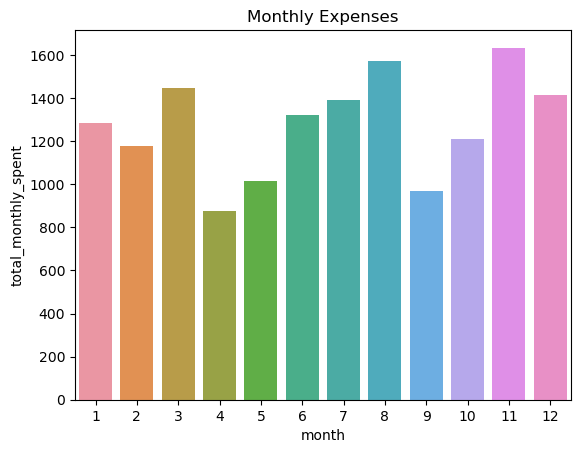

In [19]:
sns.barplot(data=df[df['from_totally_fake_account'] == 100986], x='month', y='total_monthly_spent')
plt.title('Monthly Expenses')
plt.show()

In [41]:
def month_for_max_spending(data):
    a = data.loc[data['total_monthly_spent'].idxmax(), ['month', 'total_monthly_spent']]
    return a

max_month_df = df.groupby('from_totally_fake_account',group_keys=False).apply(month_for_max_spending).reset_index(drop=True)
max_month_df.rename(columns={'month': 'max_spent_month', 'total_monthly_spent': 'max_spent'}, inplace=True)
max_month_df['max_spent_month'] = max_month_df['max_spent_month'].astype(int)

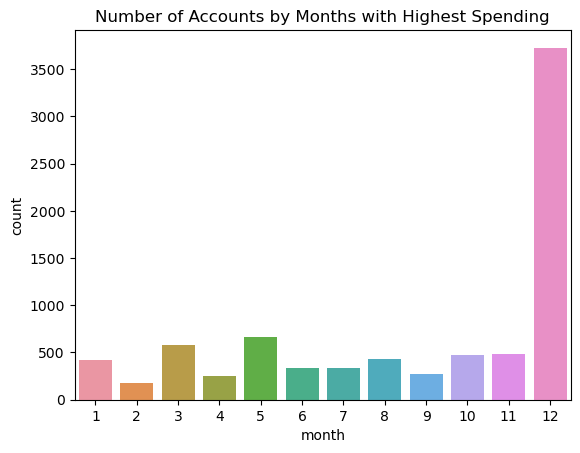

In [52]:
sns.countplot(data=max_month_df, x='max_spent_month')
plt.xlabel('month')
plt.title('Number of Accounts by Months with Highest Spending')
plt.show()

In [53]:
df = pd.read_csv('fake_transactional_data_24.csv')

In [56]:
a=df.loc[:100]

In [58]:
a.to_csv("a.csv", index=False)